# Stage 1: Preprocessing 

The data and idea for the project was taken from <https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease>

- (This provides an already cleaned dataset.) 

*The overall aim of the Kaggle assignment is to perform a prediction for the binary variable heart disease [yes, no] using a chosen selection of behavioural statistics.*


We elected to download the original dataset, and perform the cleaning ourselves, and also to impute the missing values. 
<https://www.cdc.gov/brfss/annual_data/annual_data.htm> (Please note i used SPCC to unpack the XPT datafile from CDC)

* Data preprocessing is a process of preparing the raw data and making it suitable for a machine learning model. It is the first and crucial step while creating a machine learning model.

* When creating a machine learning project, it is not always a case that we come across the clean and formatted data. And while doing any operation with data, it is mandatory to clean it and put in a formatted way. So for this, we use data preprocessing task.



## Considerations

- Originally considered how to best handle missing values, first considering dropping values or mean imputation. 
- As the project developed, investigations into MAR (missing at random) and MCAR (missing completely at random) comenced. As both require different treatments in terms of imputation. 

#### Missing Completely at Random (MCAR) 
- *Definition:* The probability that an observation is missing is unrelated to the value of the variable or to the value of any other variable. 
- Meaning that the missing value wouldn’t be able to be predicted any better with all information observed or not. 
- An example of violation is if an older person refuses to list their age more often than a younger person. 
- An example of a reasonable explination is if some variable is very expensive to measure and therefore is only done on a subset. 

#### Missing at Random (MAR) 
- *Definition:* The missingness depends only on the complete part of the data matrix not on the missing part. 
- This is satisfied when the probability of a value being missing in one variable is unrelated to the probability of missing data in another variable but may be related to the value of the variable itself. 
- MAR would be still be satisfied if the probability of missing income was related to marital status, but unrelated to income within a marital status. 
- This allows the mechanism for the missing data to be ignored, but it is important to note that it has occurred. 

#### Missing Not at Random (MNAR) 
- The reason for the observation being missing still depends on the unseen observations themselves. 

**Observations**
- For instance if the the data are not MCAR and you delete them it could create bias in the data. As the missing value may rely on a certain observed value. 
- Through investigating the data it was found that the missing values for "BMI1" (i.e. weight) are not MCAR, but rely on the sex variable. The female class of the sex variable had a higher concenrtation of missing values in BMI1. 
- If these values were simply dropped, the distribution of gender would lose an unbalanced quantity of female classed observations. 


- Other high connections of missing values are between Alcohol Drinking and Mental Health - 0 days value, but going through it o days is the most dominate so it makes sense that is has the highest amoutn connected with alcohol drinking, can could still be dropped


#### BINPI Imputation 
After initial thoughts to solve the missing values by dropping, it was decided to perform BINPI imputation on the missing values of the data set, to conserve the amount of observations. 



## Imputation 

* Imputation is a technique used for replacing the missing data with some substitute value to retain the data/information of the dataset.

*  These techniques are used because removing the data from the dataset every time is not feasible and can lead to a reduction in the size of the dataset to a large extent, which not only raises concerns for biasing the dataset but also leads to incorrect analysis.

## Why imputation is important?

* Incompatible with most of python libraries used in machine learning.

* Distortion in dataset

* affects the final model

* Another and the most important reason is “We want to restore the complete dataset”. This is mostly in the case when we do not want to lose any(more of) data from our dataset as all of it is important, & secondly, dataset size is not very big, and removing some part of it can have a significant impact on the final model.



# Preprocessing Code

In [30]:
import pandas as pd
from numpy import NaN
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

pd.set_option('display.max_rows', 100)

import warnings
warnings.filterwarnings('ignore')


In [59]:
#importing data set, full_data_heart, is the csv ouput generated from the XPT file converted through SAS
df = pd.read_csv("full_data_heart.csv")
display(df.head())
df.shape


,_state,fmonth,idate,imonth,iday,iyear,dispcode,seqno,_psu,ctelenm1,...,_rfpsa23,_clnscpy,_sgmscpy,_sgms10y,_rfblds4,_stoldna,_vircoln,_sbontim,_crcrec1,_aidtst4
0,1,1,1042020,1,4,2020,1100,2020000001,2020000001,1.0,...,NaN,1.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0
1,1,1,2072020,2,7,2020,1200,2020000002,2020000002,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
2,1,1,1232020,1,23,2020,1100,2020000003,2020000003,1.0,...,NaN,1.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,2.0
3,1,1,1092020,1,9,2020,1100,2020000004,2020000004,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,1,1,1042020,1,4,2020,1100,2020000005,2020000005,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0


(401958, 279)

In [8]:
def val_converter(df2, variable_name, value):
  '''A value that converts the encoded value back to the original value from the dataset'''

  if variable_name in ["HeartDisease", "AlcoholDrinking", "Stroke", "PhysicalActivity", "DiffWalking", "SkinCancer", "KidneyDisease"]:
    if value == 1:
      return "Yes"
    elif value == 2:
      return "No"
    elif value == 7:
      return "Don't know"# / Not Sure"
    elif value == 9:
      return "Refused"

  if variable_name == "Asthma":
    if value == 1:
      return "Current"
    elif value == 2:
      return "Former"
    elif value == 3:
      return "Never"# / Not Sure"
    elif value == 9:
      return "Don't know"

  elif variable_name == "Smoking":
    if value == 1:
      return "Current Smoker"
    elif value == 2:
      return "Current smoker - smokes some days"
    elif value == 3:
      return "Former Smoker"
    elif value == 4:
      return "Never Smoked"
    elif value == 9:
      return "Didn't Say"

  elif variable_name == "Sex":
    if value == 1:
      return "Male"
    elif value == 2:
      return "Female"

  elif variable_name == "AgeCategory":
    if value == 1:
      return "18 - 24"
    elif value == 2:
      return "25 - 29"
    elif value == 3:
      return "30 - 34"
    elif value == 4:
      return "35 - 39"
    elif value == 5:
      return "40 - 44"
    elif value == 6:
      return "45 - 49"
    elif value == 7:
      return "50 - 54"
    elif value == 8:
      return "55 - 59"
    elif value == 9:
      return "60 - 64"
    elif value == 10:
      return "65 - 69"
    elif value == 11:
      return "70 - 74"
    elif value == 12:
      return "75 - 79"
    elif value == 13:
      return "80+"
    elif value == 14:
      return "Missing"#Don't know / refused / missing"

  elif variable_name == "Race":
    if value == 1:
      return "White"
    elif value == 2:
      return "Black"
    elif value == 3:
      return "Natives"#"American Indian, or Alaskan Native"
    elif value == 4:
      return "Asian"
    elif value == 5:
      return "Hawaian"# or other pacific islanders"
    elif value == 6:
      return "Other"
    elif value == 7:
      return "Multiracial"
    elif value == 8:
      return "Hispanic" 
    elif value == 9:
      return "Missing"#"Don't know / not sure / refused" 

  elif variable_name == "Diabetic":
    if value == 1:
      return "Yes"
    elif value == 2:
      return "Yes, pregnancy"
    elif value == 3:
      return "No"
    elif value == 4:
      return "No, borderline"
    elif value == 7:
      return "Don’t know"
    elif value == 9:
      return "Refused" 

  elif variable_name == "GenHealth":
    if value == 1:
      return "Excellent"
    elif value == 2:
      return "Very Good"
    elif value == 3:
      return "Good"
    elif value == 4:
      return "Fair"
    elif value == 5:
      return "Poor"
    elif value == 7:
      return "Dont know"
    elif value == 9:
      return "Refused"

In [61]:
def transform_df(df):
  '''Selects the same variables as the heart clean data from Kaggle, and gives the columns the same names'''

  utilised_features = ["CVDCRHD4", "WEIGHT2", "HEIGHT3", "_BMI5","_smoker3", "DRNKANY5", "CVDSTRK3", 
                      "PHYSHLTH", "MENTHLTH", "DIFFWALK", "_SEX", "_ageg5yr", "_RACE", "DIABETE4", 
                      "EXERANY2", "GENHLTH", "SLEPTIM1", "_ASTHMS1", "CHCKDNY2", "CHCSCNCR"]
  features_newname = {"CVDCRHD4": "HeartDisease", "WEIGHT2": "BMI1", "HEIGHT3":"BMI2", "_smoker3":"Smoking", "DRNKANY5":"AlcoholDrinking", 
                    "CVDSTRK3":"Stroke", "PHYSHLTH":"PhysicalHealth", "MENTHLTH":"MentalHealth", "DIFFWALK":"DiffWalking", 
                    "_SEX":"Sex", "_ageg5yr":"AgeCategory", "_RACE":"Race", "DIABETE4":"Diabetic", 
                      "EXERANY2":"PhysicalActivity", "GENHLTH":"GenHealth", "SLEPTIM1":"SleepTime", "_ASTHMS1":"Asthma", 
                      "CHCKDNY2":"KidneyDisease", "CHCSCNCR":"SkinCancer", "_BMI5":"BMI_calc"}

  for i in range(len(utilised_features)):
      utilised_features[i] = utilised_features[i].lower()

  features_newname2={}
  for i in features_newname:
    features_newname2[i.lower()] = features_newname[i]

  df2 = df[utilised_features]
  df2 = df2.rename(columns = features_newname2)
  return df2

In [62]:
def compare_var(df2, variable_name, var1, var2):
  '''This function permutes over the inputted variable_name, single out each time ther is a missing value, and then stores each other key/value pair
  for this observation for selected categorical variables'''
  
  df3 = df2.copy()
  df3[variable_name].fillna(var1, inplace = True)
  df3[variable_name].replace(var2, var1, inplace = True)

  compare_list = ["Race","SleepTime", "AlcoholDrinking", "AgeCategory", "Sex"]


  for i in list(df3.columns):
    var3, var4 = return_var(df3, i)
    df3[i].fillna(var3, inplace = True)
    df3[i].replace(var4, var3, inplace = True)

  for i in compare_list:
    if i != "SleepTime":
      values = pd.unique(df3[i])
      for value in values:
        conversion = val_converter(df3, i, value)
        df3[i].replace(value, conversion, inplace = True)

  compare_dict = {} #created a diction tallying each key/value pair
  for i in range(len(df3[variable_name])):
    if df3[variable_name][i] == var1 or df3[variable_name][i] ==var2:
      for j in compare_list: #list(df3.columns): 
        if j != variable_name:
          if (j, df3[j][i]) in compare_dict:
            compare_dict[(j, df3[j][i])] += 1
          else:
            compare_dict[(j, df3[j][i])] = 1 
    else:
      if df3[variable_name][i] == val_converter(df3, variable_name, var1) or df3[variable_name][i] ==val_converter(df3, variable_name, var2):
        for j in compare_list: #list(df3.columns): 
          if j != variable_name:
            if (j, df3[j][i]) in compare_dict:
              compare_dict[(j, df3[j][i])] += 1
            else:
              compare_dict[(j, df3[j][i])] = 1 
  
  max = 0 
  for i in compare_dict:
    if compare_dict[i] > max:
      max = compare_dict[i]

  del_val = []
  for i in compare_dict:
    if compare_dict[i] < 2000:
      del_val.append(i)
      
  for i in del_val:
    del compare_dict[i]

  return compare_dict, max

In [63]:
def get_key(my_dict, val):
    '''returns key from a value in a dictionary'''
        
    for key, value in my_dict.items():
        if val == value:
            return key
    
    return "key doesn't exist"

In [64]:
def print_miss(df2):
  '''Plots all distributions for each variable's missing values'''

  fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(21, 18))
  plt.subplots_adjust(hspace=1.5)
  fig.suptitle("Distribution of Other Variables For Target Variables Missing Values", fontsize=18, y=0.95)
  
  a, b =0, 0 
  
  for variable_name in df2.columns:
    var1, var2 = return_var(df2, variable_name)
    compare_dict, max = compare_var(df2, variable_name, var1, var2)

    y = list(compare_dict.values())
    y.sort(reverse = True)
    x=[]
    for i in y:
      x.append(get_key(compare_dict, i))
    

    if max >2000:
      axs[a, b].set_title(variable_name)
      axs[a, b].bar(range(len(x)), y)

      axs[a, b].set_xticks(range(len(x)))
      axs[a, b].set_xticklabels(labels =x)
      axs[a, b].tick_params(axis = "x", labelrotation= 90)
      b += 1
      if b - 3 == 0:
        a +=1
        b = 0 
  plt.show()


In [65]:
def return_var(df2, variable_name):
  '''This function returns the values embedding to be missing (either not given, or refused to be given) according to the questionaire'''

  if variable_name in ["HeartDisease", "Smoking", "AlcoholDrinking", "Stroke", "DiffWalking", "Sex", "Diabetic", 
                       "PhysicalActivity", "GenHealth", "Asthma", "KidneyDisease", "SkinCancer", "Race"]: #mistake here, where the embedding of race 7 was said to be missing. 
    var1, var2 = 9, 7
    return var1, var2

  elif variable_name in ["BMI1", "BMI2"]:
    var1, var2 = 9999, 7777
    return var1, var2

  elif variable_name in ["PhysicalHealth", "MentalHealth", "SleepTime"]:
    var1, var2 = 99, 77
    return var1, var2
 
  elif variable_name == "AgeCategory":
    var1, var2 = 14, 0                 # 0 was chosen as it was a value outside the domain
    return var1, var2

  else:
    return np.nan, np.nan

In [66]:
def distribution(df2, featurename, as_percentage = False, as_ratio = False):
  '''Returns the distribution as a dictionary'''

  hd_dict ={}
  hd_list = list(df2[featurename].dropna()) #drop na here temporarily

  for i in hd_list:
    if i in hd_dict:
      hd_dict[i] +=1
    else:
      hd_dict[i] = 1
  
  if as_percentage:
    for key in hd_dict:
      hd_dict[key] = hd_dict[key] / len(hd_list)  

  if as_ratio:
    sum = 0
    for key in hd_dict:
      sum += hd_dict[key]

    ave_list = []
    for key in hd_dict:
      ave_list.append([key, round((hd_dict[key]/sum)*100,2)])
    return ave_list

  return hd_dict

In [67]:
def drop_var(df2, variable_name, var1, var2):
  '''This function was used to return the dataframe after dropping a variable, there is also some superfluous code in here that was used
  to identify some changes that occured when dropping. '''

  drop_list =[]
  for i in range(len(df2[variable_name])):
    if df2[variable_name][i] ==var1 or df2[variable_name][i] ==var2:
      drop_list.append(i)
  
  df2 = df2.drop(drop_list, axis=0)
  df2.reset_index(drop=True, inplace = True)

  return df2

In [68]:
def corr_heatmap(df2):
  '''Shows a correlation heatmap'''
  
  corr = df2.corr()
  sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
  plt.show()

In [69]:
def count_miss(df2):
  '''Counts the missing values and presents them in an agreeable way by using the length of the variable name'''

  print("\n","Occurances of null and missing / unresponsive values")
  for variable_name in df2.columns:
    if variable_name != "BMI_calc":
      var1, var2 = return_var(df2, variable_name)
      if len(variable_name) <= 6:
        print(  variable_name,"\t\t\t", sum( [len(df2[df2[variable_name] == var1]), len(df2[df2[variable_name] == var2]), df2[variable_name].isnull().sum() ] ) )
      elif len(variable_name) <= 14:
        print(  variable_name,"\t\t", sum( [len(df2[df2[variable_name] == var1]), len(df2[df2[variable_name] == var2]), df2[variable_name].isnull().sum() ] ) )   
      elif len(variable_name) <= 18:
        print(  variable_name,"\t", sum( [len(df2[df2[variable_name] == var1]), len(df2[df2[variable_name] == var2]), df2[variable_name].isnull().sum() ] ) )
      elif len(variable_name) < 20:
        print(  variable_name,"\t", sum( [len(df2[df2[variable_name] == var1]), len(df2[df2[variable_name] == var2]), df2[variable_name].isnull().sum() ] ) )    
    else:
      print(variable_name,"\t\t", sum(df2[variable_name].isnull()))


In [70]:
def drop_change(df2, num_var, variable_name, real_drop = False):
  '''Determines how much the other variables change after dropping the missing values of one variable'''

  if not real_drop:
    df3 = df2.copy()
  if real_drop:
    df3 = df2
    
  print("Affects of dropping",variable_name)
    
  dist_diff = {}
  var1, var2 = return_var(df2, variable_name) #still have na 
  df3[variable_name].fillna(var1, inplace = True)

  for other_var in df2.columns:
    if other_var != variable_name:
      if other_var not in num_var:
        dist_diff[other_var] = [distribution(df3, other_var, as_percentage = True)]
      else:
        var3, var4 = return_var(df2, other_var)
        mean_val = df3[-df3[other_var].isin([var3,var4])]  
        dist_diff[other_var] = [mean_val[other_var].dropna().mean(), mean_val[other_var].dropna().std()]             #df2
    
  df3 = drop_var(df3, variable_name, var1, var2) 
    
  for other_var in df2.columns:
    if other_var != variable_name:
      if other_var not in num_var:
        dist_diff[other_var] += [distribution(df3, other_var, as_percentage = True)]
      else:
        var3, var4 = return_var(df2, other_var)
        mean_val = df3[-df3[other_var].isin([var3,var4])]
        dist_diff[other_var] += [mean_val[other_var].dropna().mean(), mean_val[other_var].dropna().std()]       #df2

  for other_var in dist_diff:
    dist1, dist2 = dist_diff[other_var][0], dist_diff[other_var][1]
    if other_var not in num_var:
      new_dist_diff = {}
      for i in dist1:
        new_dist_diff[i] = dist1.get(i,0) - dist2.get(i,0)
        if new_dist_diff[i] > 0.005:
          print("Changes in Distribution for: ", other_var,"for category", val_converter(df2, other_var, i),": ", round(new_dist_diff[i]*100, 2),"%")
    else:
      mean1, std1, mean2, std2, = dist_diff[other_var][0], dist_diff[other_var][1], dist_diff[other_var][2], dist_diff[other_var][3]
      if (mean1 - mean2)/mean1 > 0.005:
        print(other_var, "Before", round(mean1,2),"with std", round(std1,2), "After", round(mean2,2), "with std", round(std2,2), "Difference", round((mean1 - mean2)/mean1*100,2),"%", "with change std", round((std1 - std2)/std1*100,2),"%")

  return 

In [71]:
def imputation_bmi1(df2):
  '''An attempt at imputating missing BMI1 (that wasn't used in the end) by storing the BMI2 for this missing value and then searching the 
  remaining observations for equal heights ans storing these values. From this list a random choice from this list was then imputed for the 
  original missing value'''

  df3 = df2.copy()

  var1, var2 = return_var(df3, "BMI1")
  df3["BMI1"].fillna(var1, inplace = True)
  var3, var4 = return_var(df3, "BMI2")
  df3["BMI2"].fillna(var3, inplace = True)
  df3["BMI_calc"].fillna(0, inplace = True)

  df3 = feet_to_inch(df3, "BMI2")
  df3 = cm_to_inch(df3, "BMI2")
  df3 = kg_to_pound(df3, "BMI1")

  drop_list =[]
  fem_list = []
  height_list = []
  height_val = []
  height_imp = []
  count= 0
  for i in range(len(df3["BMI1"])):
    if df3["BMI1"][i] == var1 or df3["BMI1"][i] == var2:
      drop_list.append(i)
      if df3["Sex"][i] == 2:
        fem_list.append(i)                                        #will append these values using 
        if df3["BMI2"][i] not in [var3, var4]:    
          height_list.append(i)                                    # has 2/3 of the values needed for imputing 14736 / 25222
          height_val.append(df3["BMI2"][i]) 
        if df3["BMI_calc"][i] != 0:
          count+=1
  print("Count of BMIcalc not missing when BMI1 is missing", count)

  mean_val = df3[-df3["BMI1"].isin([var1,var2])]  

  height_weight_dict ={}
  for i in range(len(df3["BMI2"])):
    
    if df3["BMI1"][i] not in [var1,var2]:
        if df3["BMI2"][i] in height_val:
          if df3["BMI2"][i] not in height_weight_dict:
            height_weight_dict[df3["BMI2"][i]] = [df3["BMI1"][i]]
          else:
            height_weight_dict[df3["BMI2"][i]] += [df3["BMI1"][i]]

  bmi1_list = []
  for i in range(len(df3["BMI1"])):
    if i in height_list:
      index = height_list.index(i)
      bmi1_list.append(random.choice(height_weight_dict[height_val[index]]))
    else:
      bmi1_list.append(df3["BMI1"][i])

  df3["BMI1"] = bmi1_list
  
  return df3

## Feature Functions 
Below are the individual functions for embedding and preprocessing for each of the selected variables. 

### Heart Disease Variable 

Variable Name: HeartDisease

Original variable Name: CVDCRHD4

Description: (Ever told) (you had) angina or coronary heart disease?

Domain:
- 1 Yes
- 2 No
- 7 Don’t know / Not sure
- 9 Refused

dropped 7, and 9 from the list 

Change "No" to 0 

In [72]:
def heart_df(df2):
  '''Provides basic operations on heart disease variable'''
  
  df3 = df2.copy()
  values = pd.unique(df3["HeartDisease"])
  for value in values:
    conversion = val_converter(df3, 'HeartDisease', value)
    df3["HeartDisease"].replace(value, conversion, inplace = True)

  sns.countplot(x = 'HeartDisease', data=df3)
  plt.show()
  
  df2["HeartDisease"].replace(2, 0, inplace = True)

  return df2

### "WEIGHT2": "BMI1", "HEIGHT3":"BMI2"

Variable Names: BMI1 and BMI2 to create BMI

Original Names: WEIGHT2 and HEIGHT3

Description Weight2: About how much do you weigh without shoes?

Description Height3: About how tall are you without shoes?

Domain Weight:

- _ _ _ _ Weight (pounds/kilograms)
- 7777 Don’t know / Not sure
- 9999 Refused

Domain Height:
- _ _ / _ _ Height (ft / inches/meters/centimeters)
- 77/ 77 Don’t know / Not sure
- 99/ 99 Refused

Note: If respondent answers in metrics, put 9 in first column. Round fractions up (weight) / down (height) 

- weight in pounds

- BMI = (weight in pounds x 703) / (height in inches x height in inches).

- convert kilo to pound (x 2.20462) 

- comvert cm to inch /2.54

Height and weight variables may have multiple reason for issues with missing values or inncorrect values including:
- intentionally incorrect values given
- manual errors when entering 


In [73]:
def feet_to_inch(df2, variable_name):
  '''Converts feet to inches'''
  
  bmi2 = df2[variable_name].tolist()
  for i in range(len(bmi2)):
    if bmi2[i] <7777 :
      string = str(bmi2[i])
      feet = int(string[0]) 
      inches = int(string[1:3])
      bmi2[i] = feet * 12 + inches
  df2[variable_name] = bmi2

  return df2

def cm_to_inch(df2, variable_name):
  '''Converts centimeters to inches'''

  bmi2 = df2[variable_name].tolist()
  count = 0
  for i in bmi2:
    if i > 8999 and i != 9999:
      bmi2[count] = round((i -9000)/2.54,0) 
    count +=1
  df2[variable_name] = bmi2
  
  return df2

def kg_to_pound(df2, variable_name):
  '''Converts kilograms to pounds'''

  bmi1 = df2[variable_name].tolist()               
  count = 0
  for i in bmi1:
    if i > 8999 and i != 9999:
      bmi1[count] = round((i -9000)*2.20462,0)    
    count +=1
  df2["BMI1"] = bmi1

  return df2

In [74]:
def bmi_df(df2):
  '''Specific processing for bmi variable, and calculation of unifying BMI variable, also dropping high BMI values'''
 
  bmi1 = df2["BMI1"].tolist()
  bmi2 = df2["BMI2"].tolist()
  bmi = []

  for i in range(len(bmi1)):
    bmi.append(bmi1[i]*703/(bmi2[i]**2))

  plt.title("BMI")
  sns.kdeplot(bmi)
  plt.show()

  #Evaluating other values that may be worth removing for being unbelievable 
  count = 0 
  for i in bmi:
    if i > 100:
      count +=1
  #print("amount of values in bmi higher than 100: ", count) # highest ever bmi is 250 by a female in egypt 

  df3 = pd.DataFrame(bmi, columns = ['BMI'])
  df4 = pd.concat([df2,df3],axis=1)
  df4 = df4.drop(["BMI1", "BMI2"], axis=1)

  #dropping values greater than or equal to 100 
  for i in range(len(df4["BMI"])):
    if df4["BMI"][i]>= 100:
      df4["BMI"][i] = np.nan

  return df4

In [75]:
def smoke_df(df2):
  '''Preprocessing for Smoking variable, embedding etc.'''

  smoking_list = df2["Smoking"].tolist()
  count1 = 0
  count0 = 0
  count9 = 0
  for i in range(len(smoking_list)):
    if smoking_list[i] == 1 or smoking_list[i] == 2:
      smoking_list[i] = 1
      count1 +=1                           #signify yes
    elif smoking_list[i] == 3 or smoking_list[i] == 4:
      smoking_list[i] = 0 
      count0+=1
    else:
      count9 +=1

  df3 = df2.copy()
  df3["Smoking"].replace(2, 1, inplace = True)
  df3["Smoking"].replace(3, 4, inplace = True)
  values = pd.unique(df3["Smoking"])
  for value in values:
    conversion = val_converter(df3, 'Smoking', value)
    df3["Smoking"].replace(value, conversion, inplace = True)
  sns.countplot(x = 'Smoking', data=df3)
  plt.show()

  df2["Smoking"] = smoking_list

  return df2

### Alcohol Drinking

Original variable name: DRNKANY5

DF Name: AlcoholDrinking

Description: Calculated variable for adults who reported having had at least one drink of alcohol in the past 30 days. DRNKANY5 is derived from ALCDAY5

Description ALCDAY5: During the past 30 days, how many days per week or per month did you have at least one drink of any alcoholic beverage such as beer, wine, a malt beverage or liquor?

domain 
- 1 - yes
- 2 - no
- 7 - don't know / not sure
- 9 - refused / missing 

Moves "no" from 2 to 0

In [76]:
def alcohol_df(df2):
  '''Preprocessing for the alchol drinking variable'''
  
  df3 = df2.copy()
  values = pd.unique(df3["AlcoholDrinking"])
  for value in values:
    conversion = val_converter(df3, 'AlcoholDrinking', value)
    df3["AlcoholDrinking"].replace(value, conversion, inplace = True)

  sns.countplot(x = 'AlcoholDrinking', data=df3)
  plt.show()
  df2["AlcoholDrinking"].replace(2, 0, inplace = True)

### Stroke


Variable name: stroke

Original name: CVDSTRK3

Description: (Ever told) (you had) a stroke?

Domain:
- 1 Yes
- 2 No
- 7 Don’t know / Not sure
- 9 Refused

Moves "no" from 2 to 0 

In [77]:
def stroke_df(df2):
  '''Graphics display for stroke and also changes embeddings'''
  
  df3 = df2.copy()
  values = pd.unique(df3["Stroke"])
  for value in values:
    conversion = val_converter(df3, 'Stroke', value)
    df3["Stroke"].replace(value, conversion, inplace = True)

  sns.countplot(x = 'Stroke', data=df3)
  plt.show()
  df2["Stroke"].replace(2, 0, inplace = True)

### PhysicalHealth

variable name: PhysicalHealth

Original name: PHYSHLTH

Description - Number of days in the last 30 where your physical health was not good 

- _ _ Number of days (01-30)
- 88 None
- 77 Don’t know/not sure
- 99 Refused

Changes none to 0 

In [78]:
def physhlth_df(df2):
  '''Preprocessing for physical health variable and shows a plot of the distribution'''
  
  df2["PhysicalHealth"].replace(88, 0, inplace = True)

  hd_dict = distribution(df2, "PhysicalHealth" )
  x = sorted(list(hd_dict.keys()))
  y =[]
  for i in x:
    y.append(hd_dict[i])

  plt.bar(range(len(x)), y)
  plt.xticks(range(len(x)), x, rotation = 90)
  plt.title("PhysicalHealth")
  plt.show()


### Mental Health

variable name: MentalHealth

Original name: MENTHLTH

Description - Number of days in the last 30 where your mental health was not good 

- _ _ Number of days (01-30)
- 88 None
- 77 Don’t know/not sure
- 99 Refused

Changes none embedding from 88 to 0

In [79]:
def menthlth_df(df2):
  '''Mental Health preprocessing and graphing'''

  df2["MentalHealth"].replace(88, 0, inplace = True)

  hd_dict = distribution(df2, "MentalHealth" )
  x = sorted(list(hd_dict.keys()))
  y =[]
  for i in x:
    y.append(hd_dict[i])

  plt.bar(range(len(x)), y)
  plt.xticks(range(len(x)), x, rotation = 90)
  plt.title("MentalHealth")
  plt.show()

### Difficulty Walking 

variable name: DiffWalking

Original name: DIFFWALK

Description: Do you have serious difficulty walking or climbing stairs?

Domain:
- 1 Yes
- 2 No
- 7 Don’t know / Not sure
- 9 Refused

Changes embedding of "no" from 2 to 0

In [80]:
def diffwalk_df(df2):
  '''Shows distribution of difficulty walking variable and also changes embedding of no variable'''

  df3 = df2.copy()
  values = pd.unique(df3["DiffWalking"])
  for value in values:
    conversion = val_converter(df3, 'DiffWalking', value)
    df3["DiffWalking"].replace(value, conversion, inplace = True)
  sns.countplot(x = 'DiffWalking', data=df3)
  plt.show()
  
  df2["DiffWalking"].replace(2, 0, inplace = True)

### Gender

Variable Name: Sex 

Original Name: _SEX

Description: Calculated variable for calculated sex variable. _SEX is derived from BIRTHSEX and SEXVAR

Description BIRTHSEX: What was your sex at birth? Was it male or female?
- 1 Male
- 2 Female
- 7 Don’t know/Not sure
- 9 Refused

Description SEXVAR: Calculated as per below

- 1 - Male—Code=1 if LANDSEX=1 or CELLSEX=1 or COLGSEX=1
- 2 - Female—Code=2 if LANDSEX=2 or CELLSEX=2 or COLGSEX=2

Domain:
- 1 = Male
- 2 = Female

Changed "female" embedding from 2 to 0.

In [81]:
def sex_df(df2):
  '''Changes embedding of female variable and shows plot of distribution'''
  
  df3 = df2.copy()
  values = pd.unique(df3["Sex"])
  for value in values:
    conversion = val_converter(df3, 'Sex', value)
    df3["Sex"].replace(value, conversion, inplace = True)
  sns.countplot(x = 'Sex', data=df3)
  plt.show()
  df2["Sex"].replace(2, 0, inplace = True)

### Age Category 

Variable Name: AgeCategory

Original Name: _ageg5yr

Description: Calculated variable for fourteen-level age category. _AGEG5YR is derived from AGE.

Description AGE: What is your age?
-_ _ Code age in years
-07 Don’t know / Not sure
-09 Refused

Domain:
- 1 Age 18-24
- 2 Age 25-29
- 3 Age 30-34
- 4 Age 35-39
- 5 Age 40-44
- 6 Age 45-49
- 7 Age 50-54
- 8 Age 55-59 
- 9 Age 60-64
- 10 Age 65-69
- 11 Age 70-74
- 12 Age 75-79
- 13 Age 80+
- 14 Don't know / refused / missing 

In [82]:
def age_df(df2):
  '''Age variable preprocessing, and EDA'''

  df3 = df2.copy()
  values = pd.unique(df3["AgeCategory"])
  for value in values:
    conversion = val_converter(df3, 'AgeCategory', value)
    df3["AgeCategory"].replace(value, conversion, inplace = True)
  
  hd_dict = distribution(df3, "AgeCategory" )
  x = sorted(list(hd_dict.keys()))
  y =[]
  for i in x:
    y.append(hd_dict[i])

  plt.bar(range(len(x)), y)
  plt.xticks(range(len(x)), x, rotation = 90)
  plt.title("AgeCategory")
  plt.show()



### Race

Variable Name: Race

Original Name: _RACE

Description: Calculated variable for race ethnicity categories. _RACE is derived from _MRACE1 and _HISPANC. All respondents who reported they are of Hispanic or Latino origin are coded as Hispanic.

Description _MRACE1: Calculated variable for calculated multiracial race categorization. _MRACE1 is derived from MRACASC1. If respondents reported more than one race they are assigned to the multiracial category. If MRACASC1 is less than 40 or equal to 60 then _MRACE1=MRACASC1. If MRACASC1 is 40-47 then _MRACE1=40. If MRACASC1 is 50-54 then _MRACE1=50.

Description MRACASC1: Calulated variable for MRACORG1 with 77,88,99s removed, in ascending order. MRACASC1 is derived from MRACORG1. The values that make up MRACORG1 are sorted from smallest to largest.

Description MRACORG1: Calculated variable for MRACE1 with 77,88,99s removed. MRACORG1 is derived from MRACE1 in the original order in which the data were received from the state or territory. If MRACE1 is greater than 99, then any 77, 80, 88, or 99 is removed. If MRACE1 is less than or equal to 99, then MRACORG1 is equal to MRACE1.

Description MRACE1: Which one or more of the following would you say is your race?

10 White,
20 Black or African American,
30 American Indian or Alaska Native,
40 Asian,
41 Asian Indian,
42 Chinese,
43 Filipino,
44 Japanese,
45 Korean,
46 Vietnamese,
47 Other Asian,
50 Pacific Islander,
51 Native Hawaiian,
52 Guamanian or Chamorro,
53 Samoan,
54 Other Pacific Islander,
60 Other,
88 No additional choices,
77 Don’t know / Not sure,
99 Refused


Domain: 

- 1 White
- 2 Black
- 3 American Indian, or Alaskan Native
- 4 Asian
- 5 Native Hawaiian or other pacific islanders
- 6 Other 
- 7 Multiracial 
- 8 Hispanic 
- 9 Don't know / not sure / refused 

In [83]:
def race_df(df2):
  '''Plots race distribution'''
  
  df3 = df2.copy()
  values = pd.unique(df3["Race"])
  for value in values:
    conversion = val_converter(df3, 'Race', value)
    df3["Race"].replace(value, conversion, inplace = True)

  hd_dict = distribution(df3, "Race" )

  x = sorted(list(hd_dict.keys()))
  y =[]
  for i in x:
    y.append(hd_dict[i])

  plt.bar(range(len(x)), y)
  plt.xticks(range(len(x)), x, rotation = 90)
  plt.title("Race")
  plt.show()

### Diabetic

Variable Name: Diabetic

Original Name: DIABETE4

Description: (Ever told) (you had) diabetes?

Domain: 
- 1 Yes
- 2 Yes, but female told only during pregnancy
- 3 No
- 4 No, pre-diabetes or borderline diabetes
- 7 Don’t know / Not sure
- 9 Refused



In [84]:
def diabetic_df(df2):
  '''Plots diabetic distribution'''

  df3 = df2.copy()
  values = pd.unique(df3["Diabetic"])
  for value in values:
    conversion = val_converter(df3, 'Diabetic', value)
    df3["Diabetic"].replace(value, conversion, inplace = True)

  hd_dict = distribution(df3, "Diabetic" )

  x = sorted(list(hd_dict.keys()))
  y =[]
  for i in x:
    y.append(hd_dict[i])

  plt.bar(range(len(x)), y)
  plt.xticks(range(len(x)), x, rotation = 90)
  plt.title("Diabetic")
  plt.show()

### PhysicalActivity

Variable Name - PhysicalActivity

Original Name - EXERANY2

Description: During the past month, other than your regular job, did you participate in any physical activities or exercises such as running, calisthenics, golf, gardening, or walking for exercise?

Domain:

- 1 Yes
- 2 No
- 7 Don’t know / Not sure
- 9 Refused



In [85]:
def physact_df(df2):
  '''plots distribution and changes No embedding from 2 to 0'''
  
  df3 = df2.copy()
  values = pd.unique(df3["PhysicalActivity"])
  for value in values:
    conversion = val_converter(df3, 'PhysicalActivity', value)
    df3["PhysicalActivity"].replace(value, conversion, inplace = True)
  sns.countplot(x = 'PhysicalActivity', data=df3)
  plt.show()
  
  df2["PhysicalActivity"].replace(2, 0, inplace = True)


### GenHealth

Variable Name: GenHealth

Original Name: GENHLTH

Description: Would you say that in general your health is—

Domain: 

- 1 Excellent
- 2 Very Good
- 3 Good
- 4 Fair
- 5 Poor
- 7 Don’t know/Not sure
- 9 Refused

In [86]:
def genhlth_df(df2):
  '''Plots general health distribution'''

  df3 = df2.copy()
  values = pd.unique(df3["GenHealth"])
  for value in values:
    conversion = val_converter(df3, 'GenHealth', value)
    df3["GenHealth"].replace(value, conversion, inplace = True)

  hd_dict = distribution(df3, "GenHealth" )
  x = ["Excellent","Very Good", "Good", "Fair", "Poor"]#,"Dont know", "Refused" ]
  y =[]
  for i in x:
    if i in hd_dict.keys():
      y.append(hd_dict[i])
    else:
      print(i)
      x.remove(i)

  plt.bar(range(len(x)), y)
  plt.xticks(range(len(x)), x, rotation = 90)
  plt.title("GenHealth")
  plt.show()

### SleepTime

Variable Name: SleepTime

Original Name: SLEPTIM1

Description: On average, how many hours of sleep do you get in a 24-hour period?

Domain:

- _ _ Number of hours [01-24]
- 77 Don’t know / Not sure
- 99 Refused

Discrete Variable 

Dropped responses where >12 hours a day 

In [87]:
def sleep_df(df2):
  '''Marks values greater than 12 hours of sleep for NAN (for later processing), shows graph of distribution'''

  for i in range(len(df2["SleepTime"])):
    if df2["SleepTime"][i] >12:
      df2["SleepTime"][i] = np.nan

  hd_dict = distribution(df2, "SleepTime" )
  x = sorted(list(hd_dict.keys()))
  y =[]
  for i in x:
    y.append(hd_dict[i])

  plt.bar(range(len(x)), y)
  plt.xticks(range(len(x)), x, rotation = 90)
  plt.title("SleepTime")
  plt.show()


### Asthma

Variable Name: Asthma

Original Name: _ASTHMS1

Description: Calculated variable for computed asthma status. _ASTHMS1 is derived from ASTHMA3 and ASTHNOW.

Descriprion ASTHMA3: (Ever told) (you had) asthma?
1 Yes, 
2 No, 
7 Don’t know / Not sure,
9 Refused

Description ASTHNOW: Do you still have asthma?
1 Yes
2 No
7 Don’t know / Not sure
9 Refused

Domain

- 1 Current
- 2 Former
- 3 Never
- 9 Don't know / not sure / refused / missing 

Different from kaggle dataset, which reduces this to a binary variable. 

In [88]:
def asthma_df(df2):
  '''Plots distribution of astma'''

  df3 = df2.copy()
  values = pd.unique(df3["Asthma"])
  for value in values:
    conversion = val_converter(df3, 'Asthma', value)
    df3["Asthma"].replace(value, conversion, inplace = True)

  hd_dict = distribution(df3, "Asthma" )
  x = sorted(list(hd_dict.keys()))
  y =[]
  for i in x:
    y.append(hd_dict[i])

  plt.bar(range(len(x)), y)
  plt.xticks(range(len(x)), x, rotation = 90)
  plt.title("Asthma")
  plt.show()


### KidneyDisease

Variable Name: KidneyDisease

Original Name: CHCKDNY2

Description: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?

Domain: 
- 1 Yes
- 2 No
- 7 Don’t know / Not sure
- 9 Refused


In [89]:
def kidney_df(df2):
  '''Changes embedding for the no response, and plots distribution'''

  df3 = df2.copy()
  values = pd.unique(df3["KidneyDisease"])
  for value in values:
    conversion = val_converter(df3, 'KidneyDisease', value)
    df3["KidneyDisease"].replace(value, conversion, inplace = True)
  sns.countplot(x = 'KidneyDisease', data=df3)
  plt.show()
  
  df2["KidneyDisease"].replace(2, 0, inplace = True)


### SkinCancer

Variable Name: SkinCancer

Original Name: CHCSCNCR

Description: (Ever told) (you had) skin cancer?

Domain:

- 1 Yes
- 2 No
- 7 Don’t know / Not sure
- 9 Refused

In [90]:
def skincncr_df(df2):
  '''Plots distribution and changes embedding for "no" response'''

  df3 = df2.copy()
  values = pd.unique(df3["SkinCancer"])
  for value in values:
    conversion = val_converter(df3, 'SkinCancer', value)
    df3["SkinCancer"].replace(value, conversion, inplace = True)
  sns.countplot(x = 'SkinCancer', data=df3)
  plt.show()

  df2["SkinCancer"].replace(2, 0, inplace = True)



 Occurances of null and missing / unresponsive values
HeartDisease 		 3302
BMI1 			 34915
BMI2 			 21726
BMI_calc 		 41357
Smoking 		 21100
AlcoholDrinking 	 26775
Stroke 			 1186
PhysicalHealth 		 8691
MentalHealth 		 7929
DiffWalking 		 16759
Sex 			 0
AgeCategory 		 8257
Race 			 17302
Diabetic 		 814
PhysicalActivity 	 682
GenHealth 		 961
SleepTime 		 4694
Asthma 			 2927
KidneyDisease 		 1516
SkinCancer 		 1275


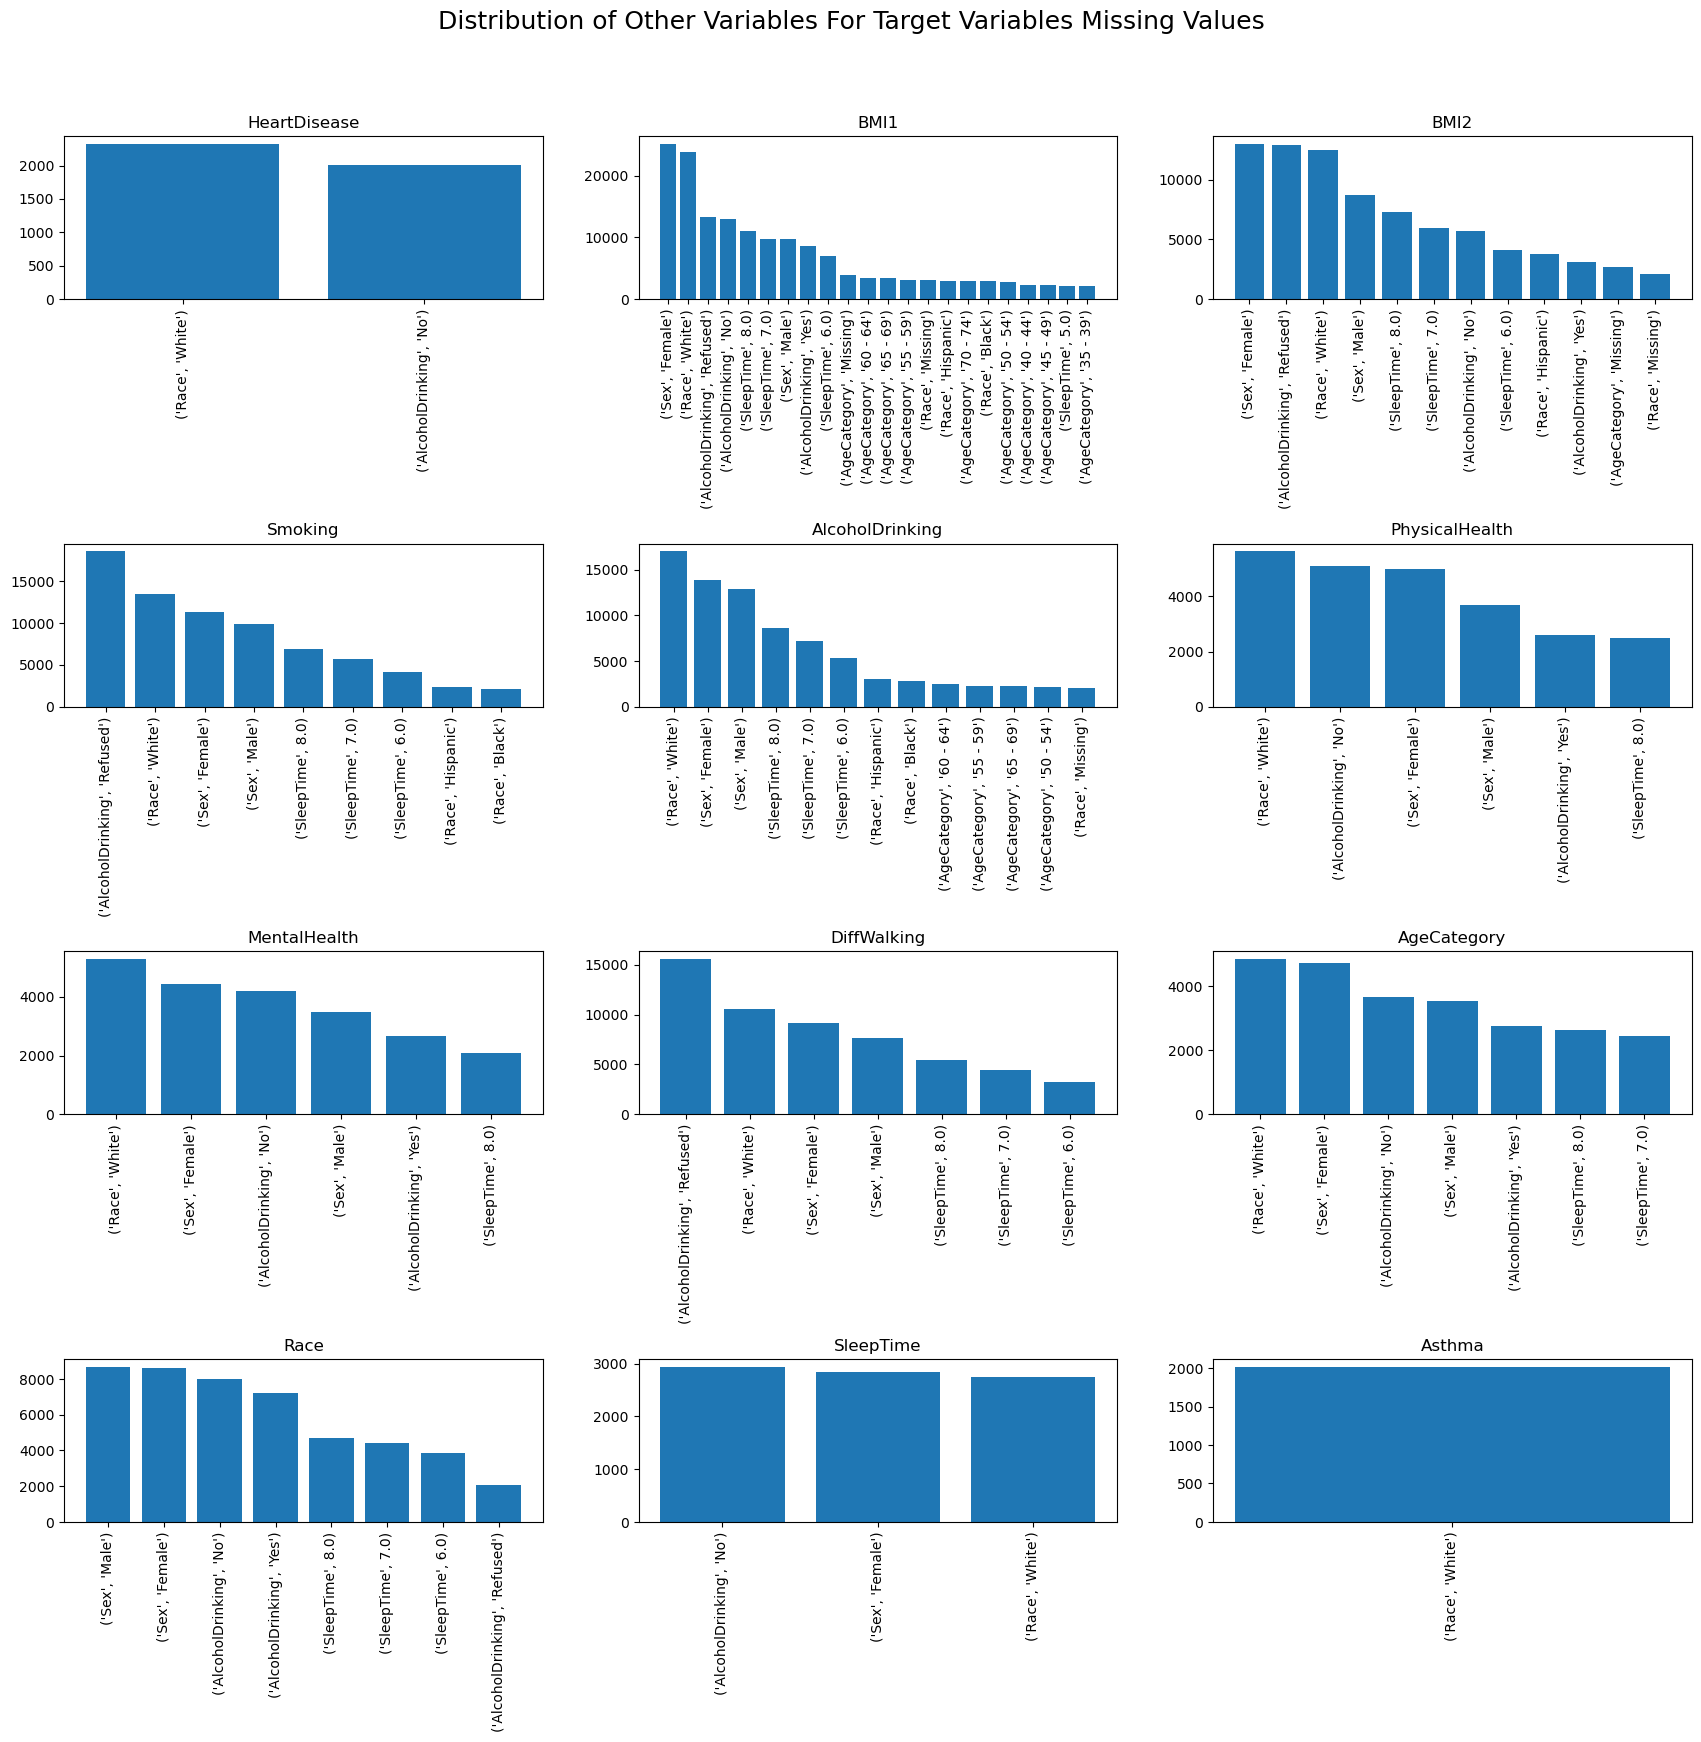

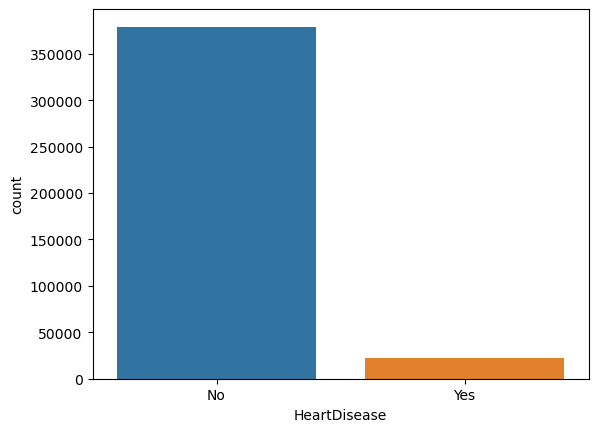

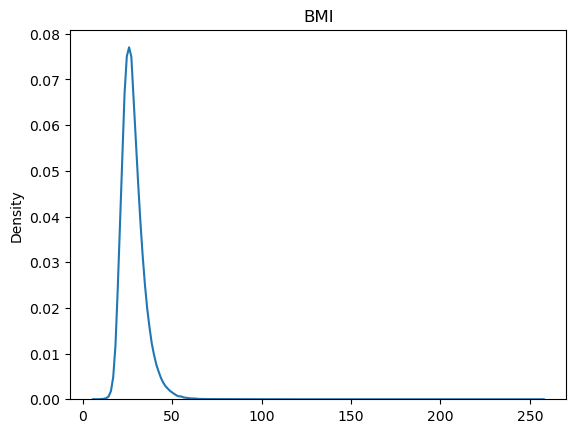

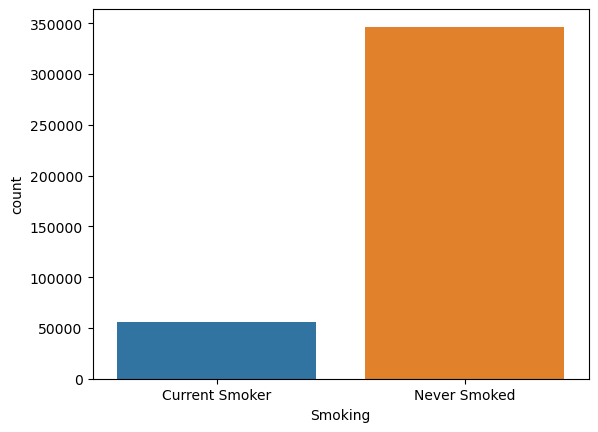

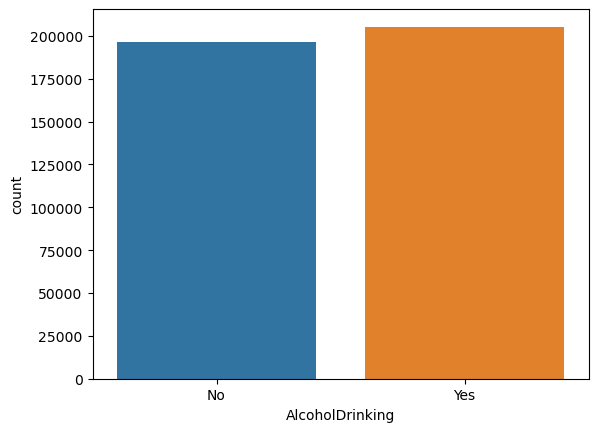

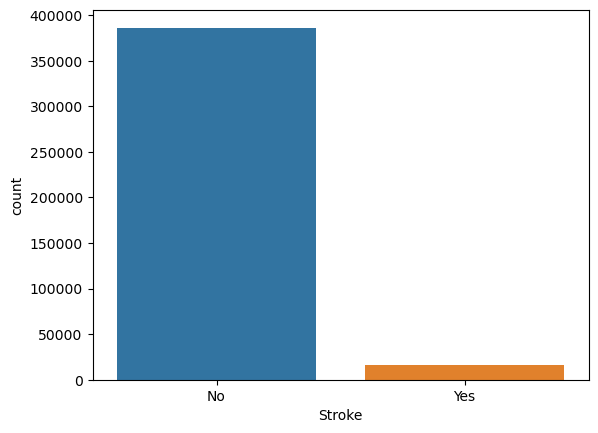

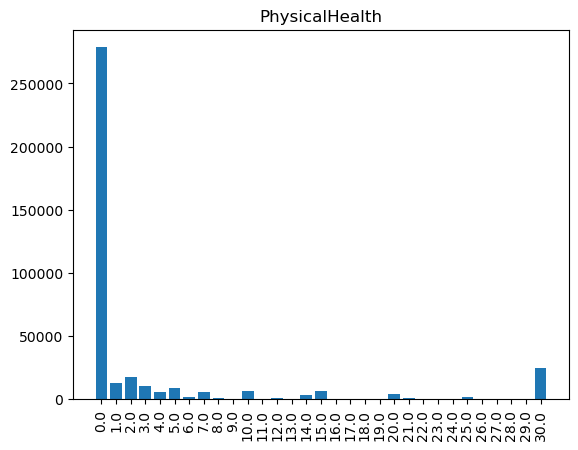

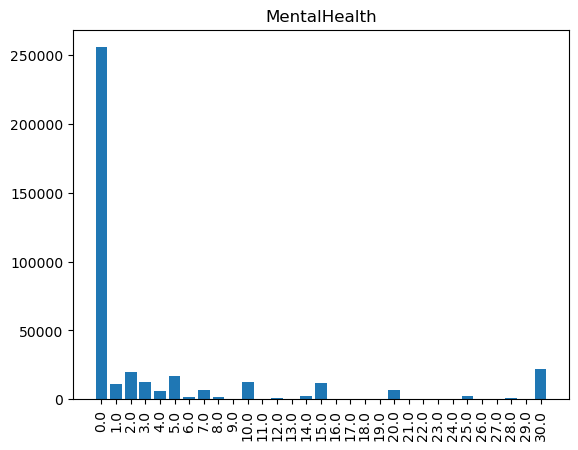

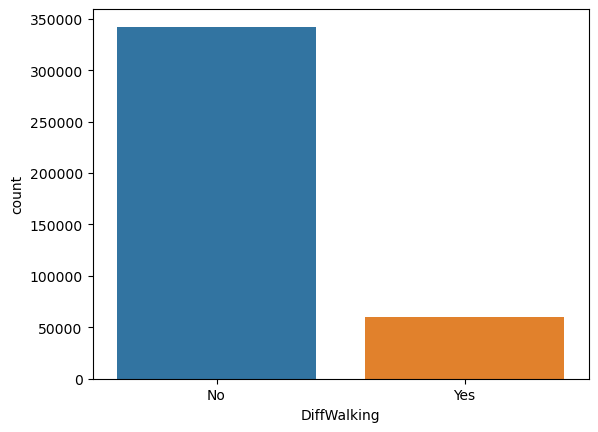

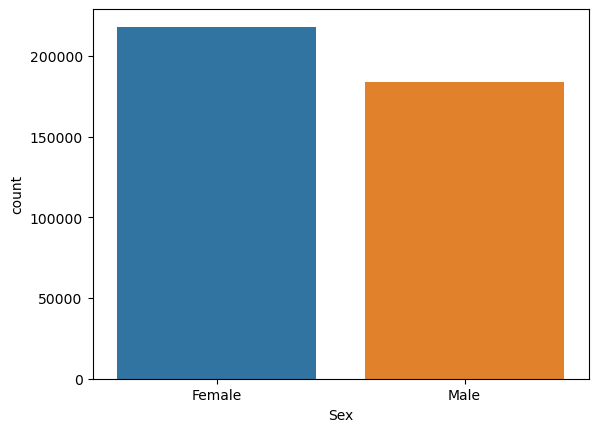

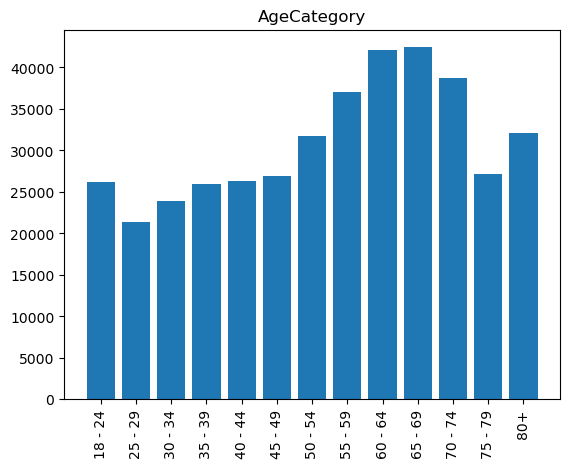

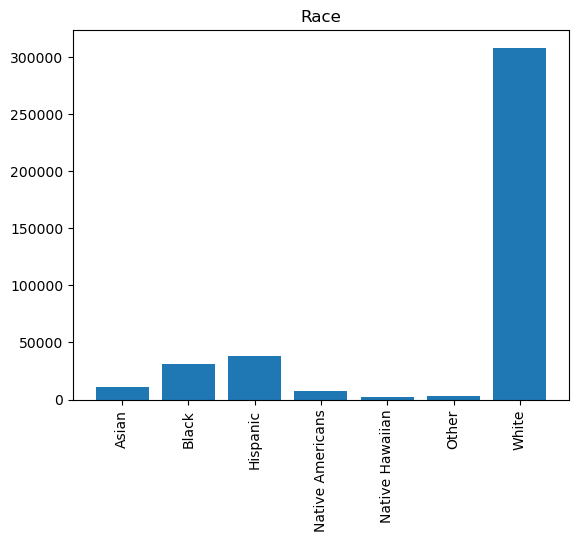

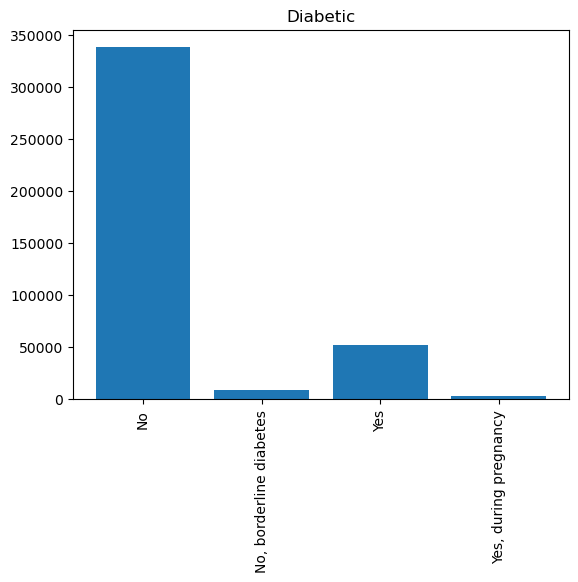

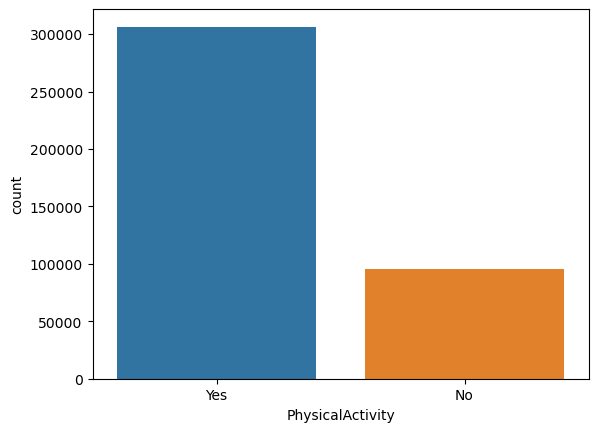

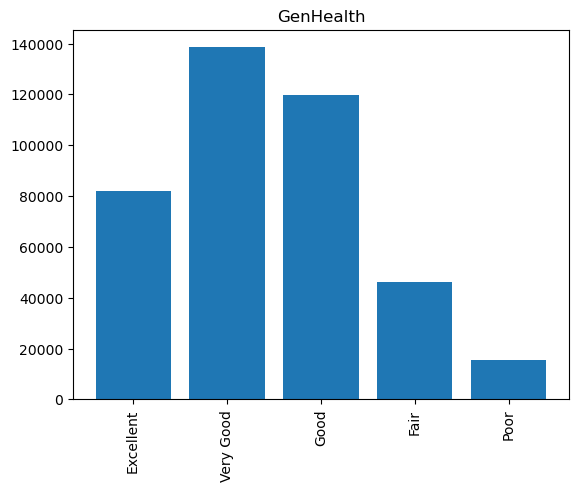

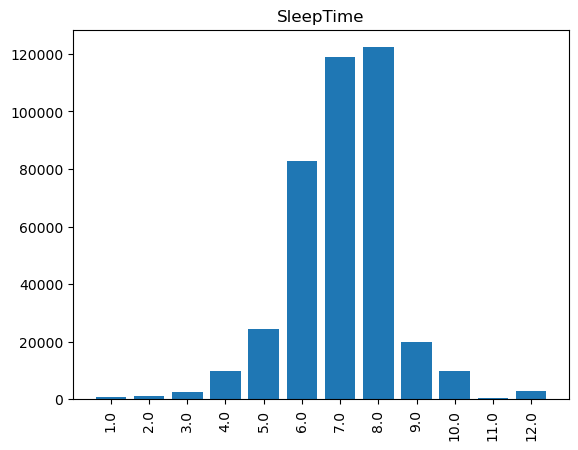

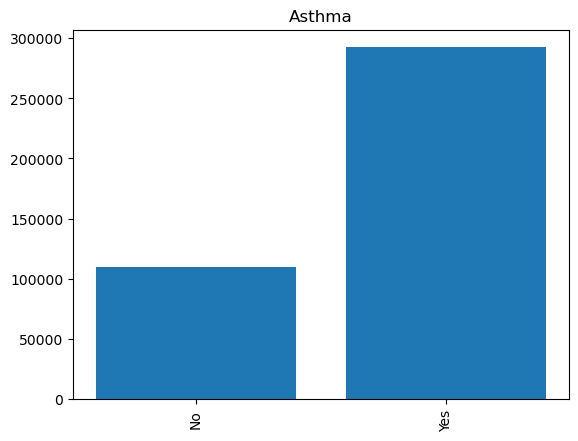

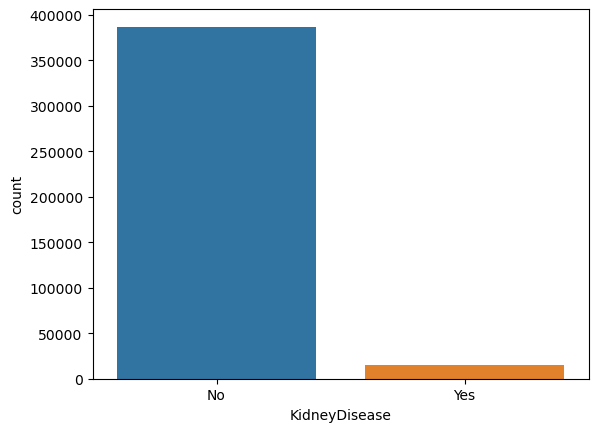

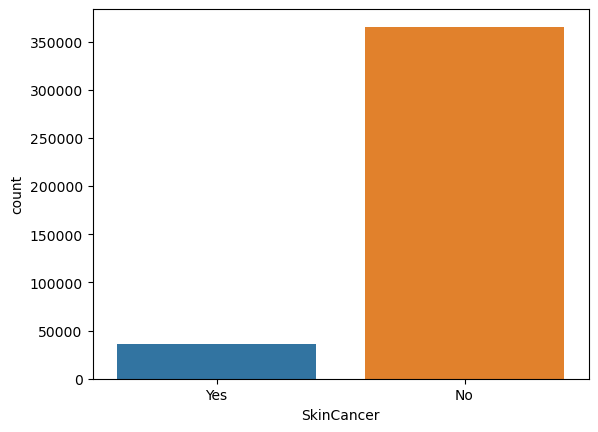

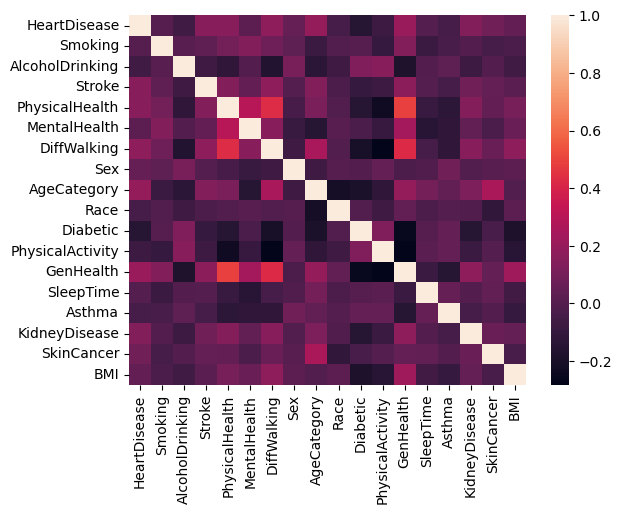

,HeartDisease,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMI
0,0.0,1.0,0.0,0.0,3.0,30.0,0.0,0,8.0,1.0,1.0,1.0,2.0,5.0,1.0,0.0,1.0,16.600134
1,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0,10.0,2.0,3.0,1.0,3.0,7.0,2.0,0.0,0.0,29.177246
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,10.0,2.0,3.0,1.0,3.0,7.0,3.0,0.0,0.0,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,13.0,1.0,3.0,0.0,1.0,6.0,3.0,0.0,0.0,NaN
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,13.0,1.0,3.0,1.0,2.0,7.0,3.0,0.0,0.0,20.334711


In [94]:
df2 = transform_df(df)
count_miss(df2)
print_miss(df2)   
df2 = feet_to_inch(df2, "BMI2") 
df2 = cm_to_inch(df2, "BMI2")
df2 = kg_to_pound(df2, "BMI1")
for variable_name in df2.columns:
    var1, var2 = return_var(df2, variable_name)
    df2[variable_name].replace(var1, np.nan, inplace = True)
    df2[variable_name].replace(var2, np.nan, inplace = True)

df2 = heart_df(df2)
df2 = bmi_df(df2)
df2 = smoke_df(df2)
alcohol_df(df2)
stroke_df(df2)
physhlth_df(df2)
menthlth_df(df2)
diffwalk_df(df2)
sex_df(df2)
age_df(df2)
race_df(df2)
diabetic_df(df2)
physact_df(df2)
genhlth_df(df2)
sleep_df(df2)
asthma_df(df2)
kidney_df(df2)
skincncr_df(df2)

df2.drop(columns= "BMI_calc", axis = 0, inplace = True) 
corr_heatmap(df2)
display(df2.head())

df2.to_csv("heart_data_pre_imp.csv", index=False)


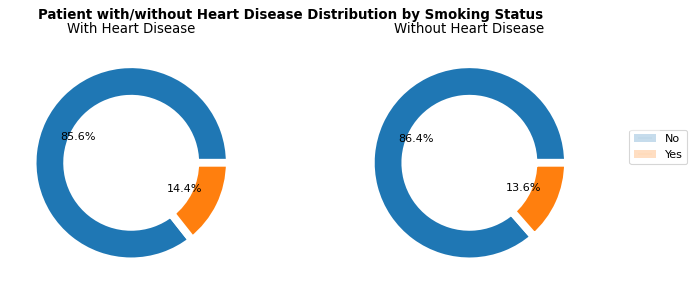

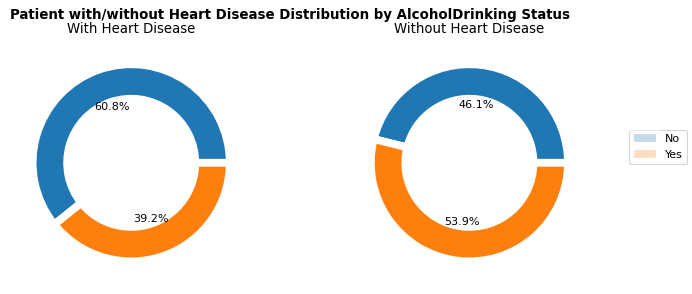

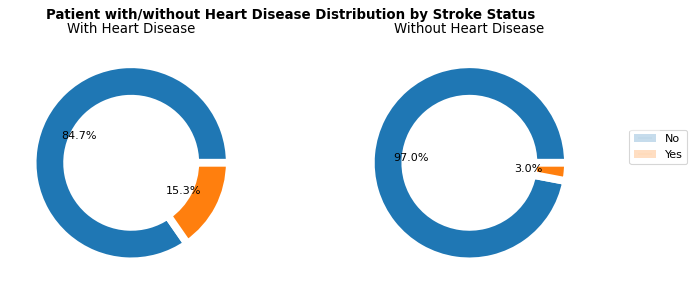

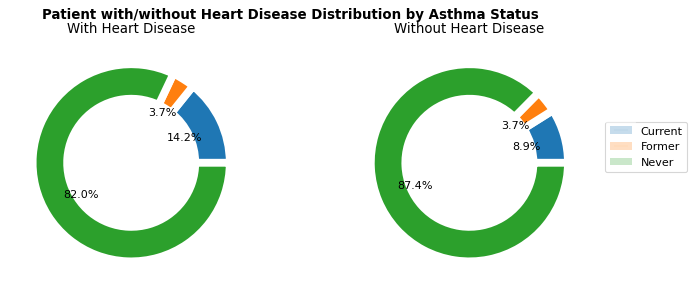

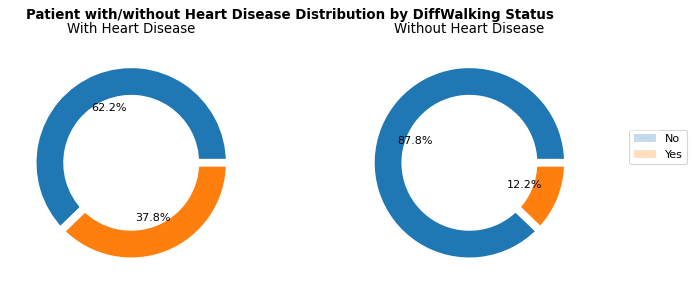

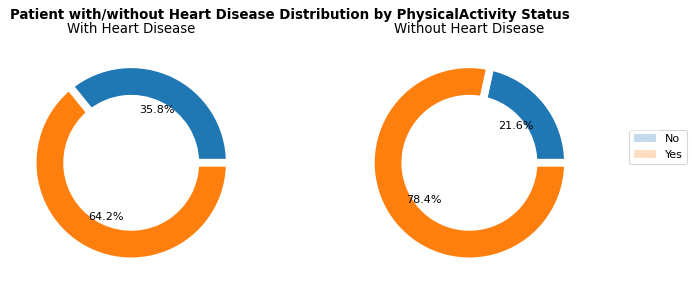

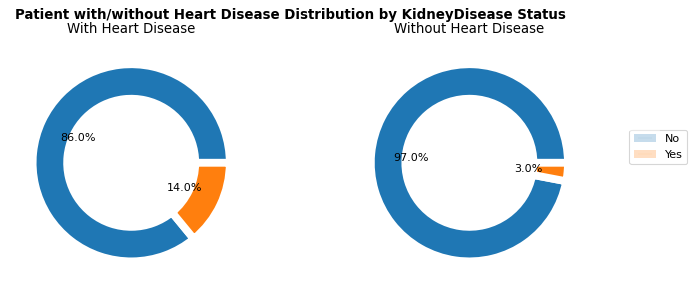

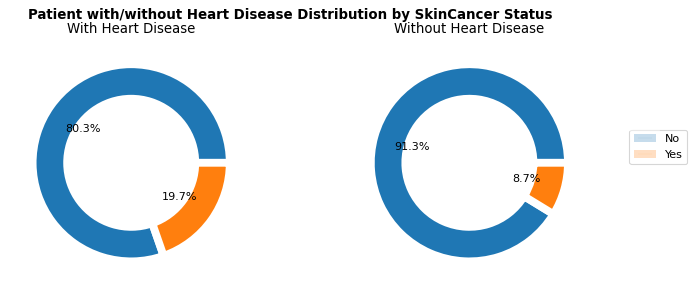

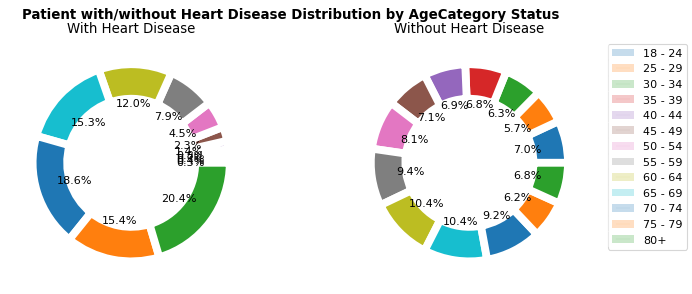

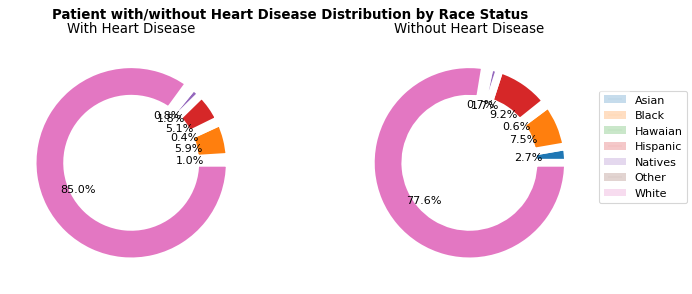

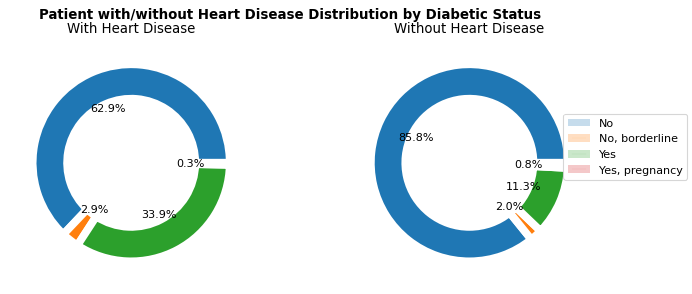

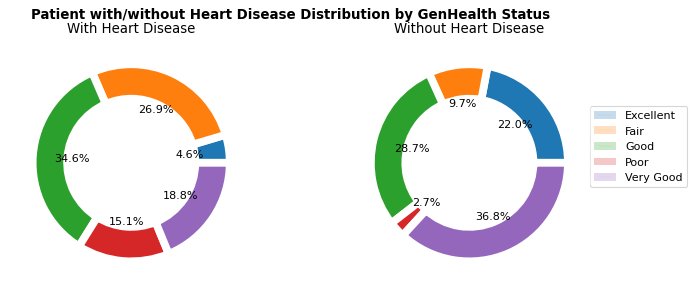

In [164]:
cat_vars = ['Sex','Smoking','AlcoholDrinking','Stroke','Asthma', 'DiffWalking','PhysicalActivity','KidneyDisease',
            'SkinCancer',"AgeCategory", "Race", "Diabetic", "GenHealth"]
df3 = df2.copy()
df3.dropna(inplace = True)
df3["Smoking"].replace(0, "No", inplace = True)
df3["Smoking"].replace(1, "Yes", inplace = True)
for i in cat_vars:
    if i != "Smoking":
        values = pd.unique(df3[i])
        for value in values:
            if value == 0:
                value = 2
            conversion = val_converter(df3, i, value)
            if i not in ["Asthma","AgeCategory", "Race", "Diabetic", "GenHealth" ]:
                if value ==2:
                    value = 0
            df3[i].replace(value, conversion, inplace = True)
for i in range(1, len(cat_vars)):
    fig = plt.figure(figsize=(10,4), dpi=80)
    # Plot distribution of adults with heart disease
    ax1 = plt.subplot(1,2,1)
    df3[df3['HeartDisease'] == 1].groupby(df3[cat_vars[i]]).HeartDisease.count().plot(kind='pie', autopct='%.1f%%', 
                                labeldistance=None, wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white', 'width':0.35 })
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.title("With Heart Disease")
    # Plot distribution of adults without heart disease
    ax2 = plt.subplot(1,2,2)
    df3[df3['HeartDisease'] == 0].groupby(df3[cat_vars[i]]).HeartDisease.count().plot(kind='pie', autopct='%.1f%%', 
                                labeldistance=None, wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white', 'width':0.35 })
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.title("Without Heart Disease")
    plt.suptitle("Patient with/without Heart Disease Distribution by " + cat_vars[i] + " Status", fontweight='bold')
    handles, labels = ax1.get_legend_handles_labels()
    leg = fig.legend(handles, labels, loc = 'right', fancybox=True)
    for lh in leg.legendHandles: 
        lh.set_alpha(0.5)
    plt.subplots_adjust(right=0.9)
    plt.show()
    

# References:
- Data Pre-processing and CleanSing. Roberta Siciliano, University of Napoli Federico II, Data Science Unina
- R. Nisbet, J. Elder, G. Miner, Handbook of Statistical Analysis & Data Mining Applications, 2009
- Kaggle, Personal Key Indicators of Heart Disease, 2020 <https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease>
- Centers for Disease Control and Prevention, Behaviour Risk Factor Surveillance System, 2020, https://www.cdc.gov/brfss/annual_data/annual_data.htm